In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import os

In [2]:
accident_df_2019 = pd.read_csv('Accident_Data_2019_dropna.csv')
accident_df_2020 = pd.read_csv('Accident_Data_2020_dropna.csv')
#accident_df_2020.head()

In [3]:
# Create df that has states and their respective divisions
d = {'State':['WA','OR','CA',
               'MT','ID','NV','WY','UT','CO','AZ','NM',
               'ND','SD','NE','KS','MN','IA','MO',
               'TX','OK','AR','LA',
               'WI','IL','MI','IN','OH',
               'KY','TN','MS','AL',
               'ME','VT','NH','MA','CT','RI',
               'NY','NJ','PA',
               'WV','DE','MD','VA','NC','SC','GA','FL'],
    'Division':['Pacific','Pacific','Pacific',
                'Mountain','Mountain','Mountain','Mountain','Mountain','Mountain','Mountain','Mountain',
                'West North Central','West North Central','West North Central','West North Central','West North Central','West North Central','West North Central',
                'West South Central','West South Central','West South Central','West South Central',
                'East North Central','East North Central','East North Central','East North Central','East North Central',
                'East South Central','East South Central','East South Central','East South Central',
                'New England','New England','New England','New England','New England','New England',
                'Middle Atlantic','Middle Atlantic','Middle Atlantic',
                'South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic']}
all_div_df = pd.DataFrame(data=d)
all_div_df.head()
# Add divisions column to original df
accident_df_2019_w_divisions = pd.merge(accident_df_2019,all_div_df,on='State')
#accident_df_2019_w_divisions.head()
accident_df_2020_w_divisions = pd.merge(accident_df_2020,all_div_df,on='State')
#accident_df_2020_w_divisions.head()

In [4]:
sum_sev_by_div_df_2019 = pd.DataFrame(accident_df_2019_w_divisions.groupby('Division')['Severity'].sum().rename('Sum_of_Severity_Scores').reset_index())
sum_sev_by_div_df_2020 = pd.DataFrame(accident_df_2020_w_divisions.groupby('Division')['Severity'].sum().rename('Sum_of_Severity_Scores').reset_index())


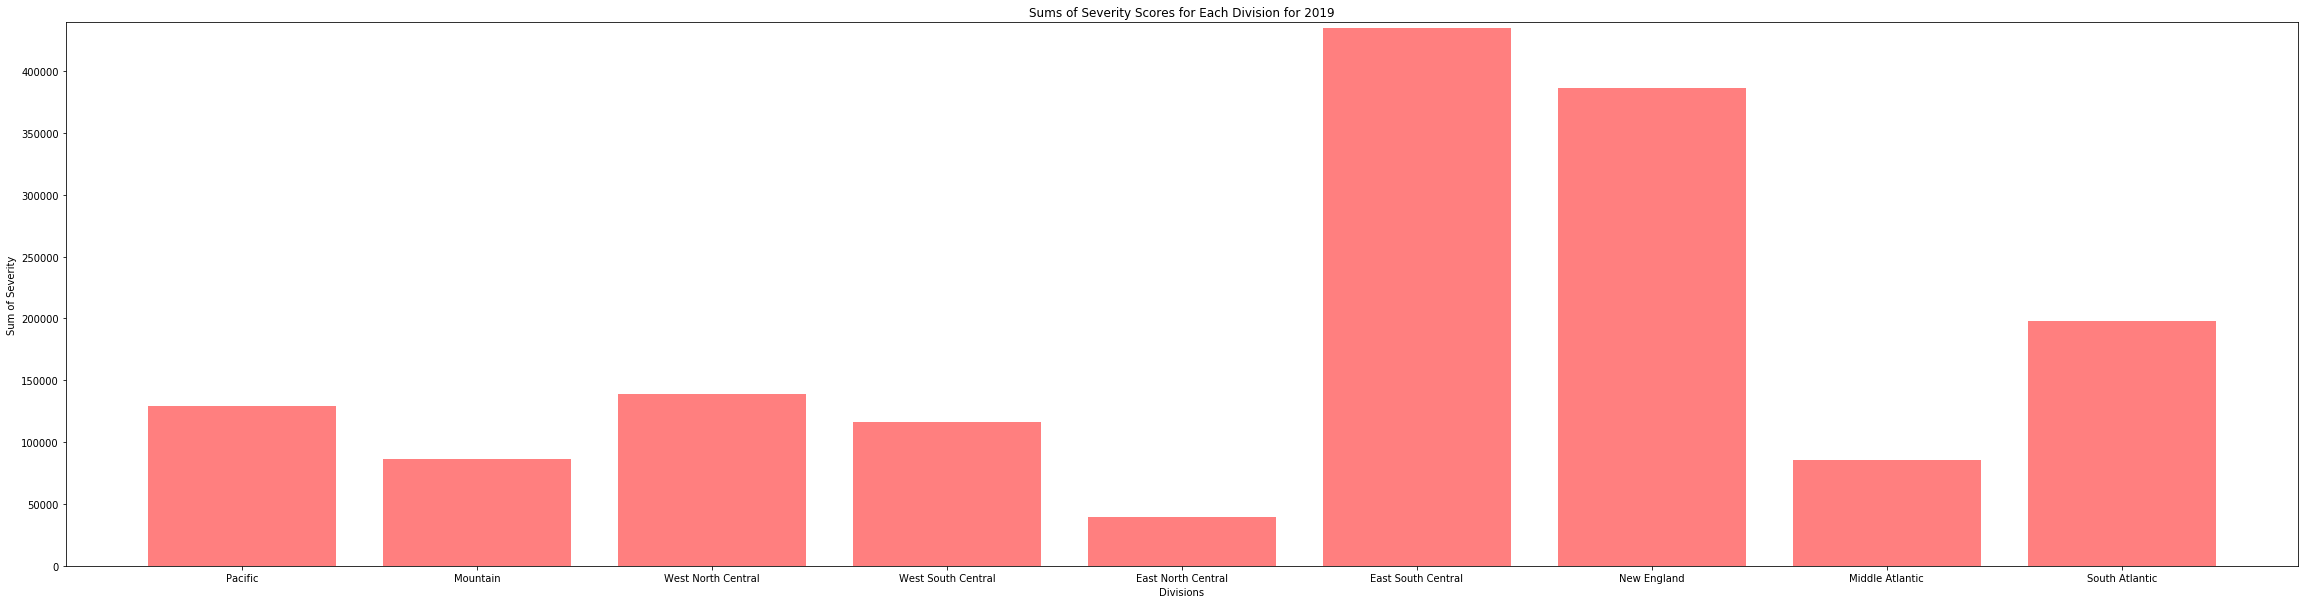

In [5]:
# Create bar chart for 2019 of sum of severity scores for each division.
sev_sum = sum_sev_by_div_df_2019['Sum_of_Severity_Scores']
x_axis = np.arange(len(sev_sum))
plt.figure(figsize=(40, 10))
plt.bar(x_axis, sev_sum, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Pacific", "Mountain", "West North Central", "West South Central", "East North Central", "East South Central", 'New England', 'Middle Atlantic', 'South Atlantic'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sev_sum)+5000)
plt.title("Sums of Severity Scores for Each Division for 2019")
plt.xlabel("Divisions")
plt.ylabel("Sum of Severity")

# Save image
plt.savefig('Images/Sums of Severity Scores for Each Division for 2019.png')
plt.show()

In [6]:
# Basic stats for bar chart above
sum_sev_by_div_df_2019['Sum_of_Severity_Scores'].describe()

count         9.000000
mean     179371.444444
std      138547.727969
min       39157.000000
25%       86128.000000
50%      129244.000000
75%      197912.000000
max      434405.000000
Name: Sum_of_Severity_Scores, dtype: float64

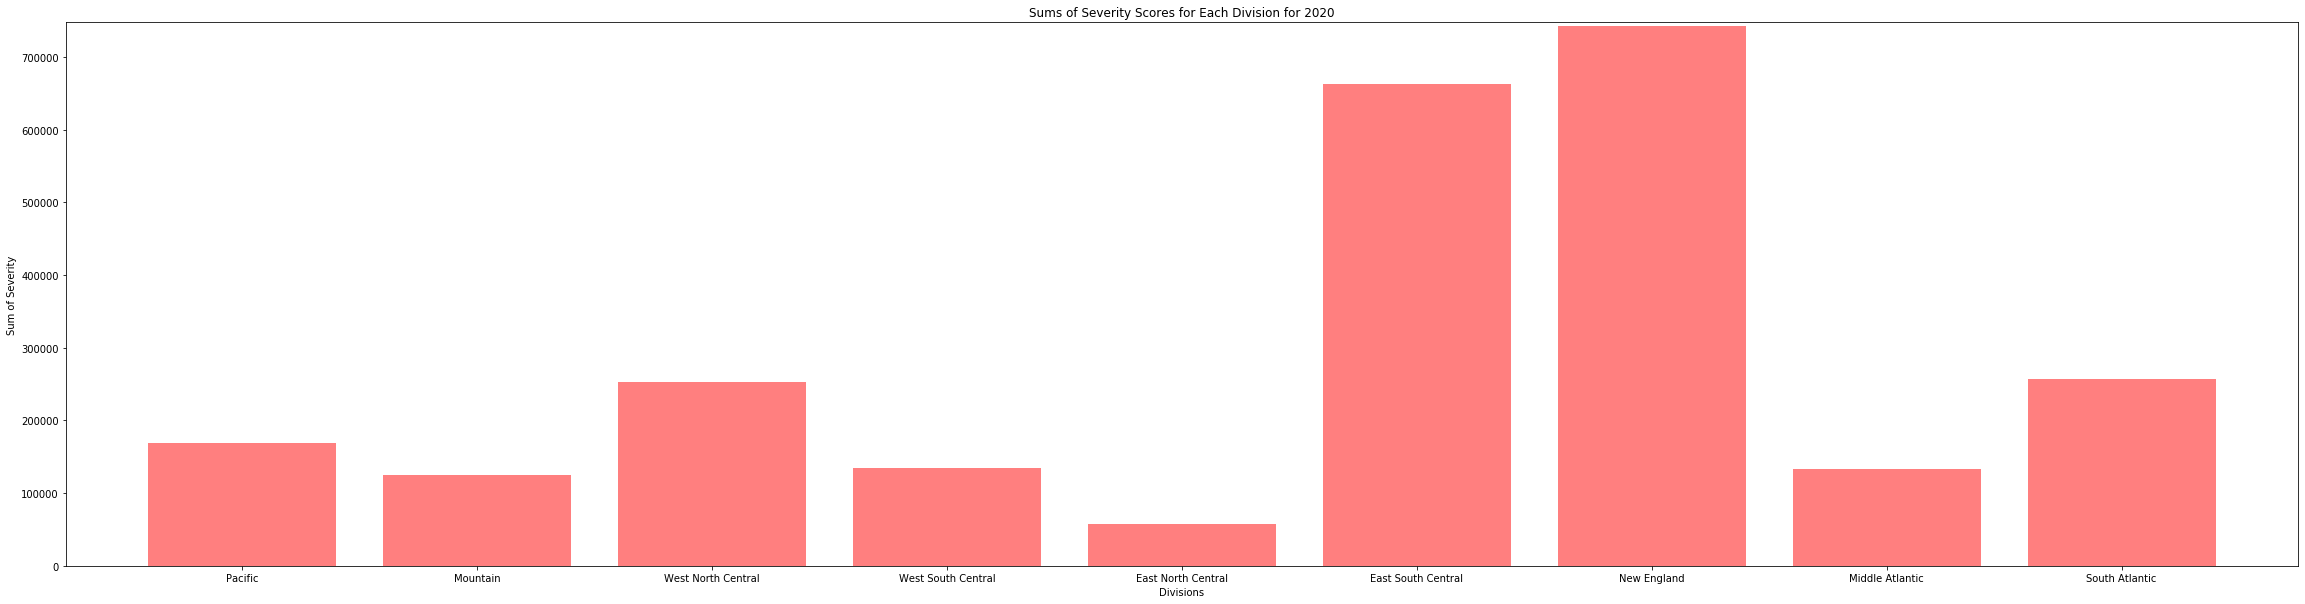

In [7]:
# Create bar chart for 2020 of sum of severity scores for each division.
sev_sum = sum_sev_by_div_df_2020['Sum_of_Severity_Scores']
x_axis = np.arange(len(sev_sum))
plt.figure(figsize=(40, 10))
plt.bar(x_axis, sev_sum, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Pacific", "Mountain", "West North Central", "West South Central", "East North Central", "East South Central", 'New England', 'Middle Atlantic', 'South Atlantic'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sev_sum)+5000)
plt.title("Sums of Severity Scores for Each Division for 2020")
plt.xlabel("Divisions")
plt.ylabel("Sum of Severity")

# Save image
plt.savefig('Images/Sums of Severity Scores for Each Division for 2020.png')
plt.show()

In [8]:
# Basic stats for bar chart above
sum_sev_by_div_df_2020['Sum_of_Severity_Scores'].describe()

count         9.000000
mean     281982.444444
std      247682.031237
min       57913.000000
25%      133612.000000
50%      168497.000000
75%      257679.000000
max      742920.000000
Name: Sum_of_Severity_Scores, dtype: float64

In [9]:
# Create data frames for count of severity scores that are 4 for each division and each year.
Count_of_Severity_Score_2019 = pd.DataFrame(accident_df_2019_w_divisions.groupby('Division')['Severity'].value_counts().rename('Count_of_Severity_Score').reset_index())
Count_of_Severity_Score_2020 = pd.DataFrame(accident_df_2020_w_divisions.groupby('Division')['Severity'].value_counts().rename('Count_of_Severity_Score').reset_index())
Count_of_Severity_Score_4_2019 = Count_of_Severity_Score_2019[Count_of_Severity_Score_2019['Severity'] == 4]
Count_of_Severity_Score_4_2020 = Count_of_Severity_Score_2020[Count_of_Severity_Score_2020['Severity'] == 4]

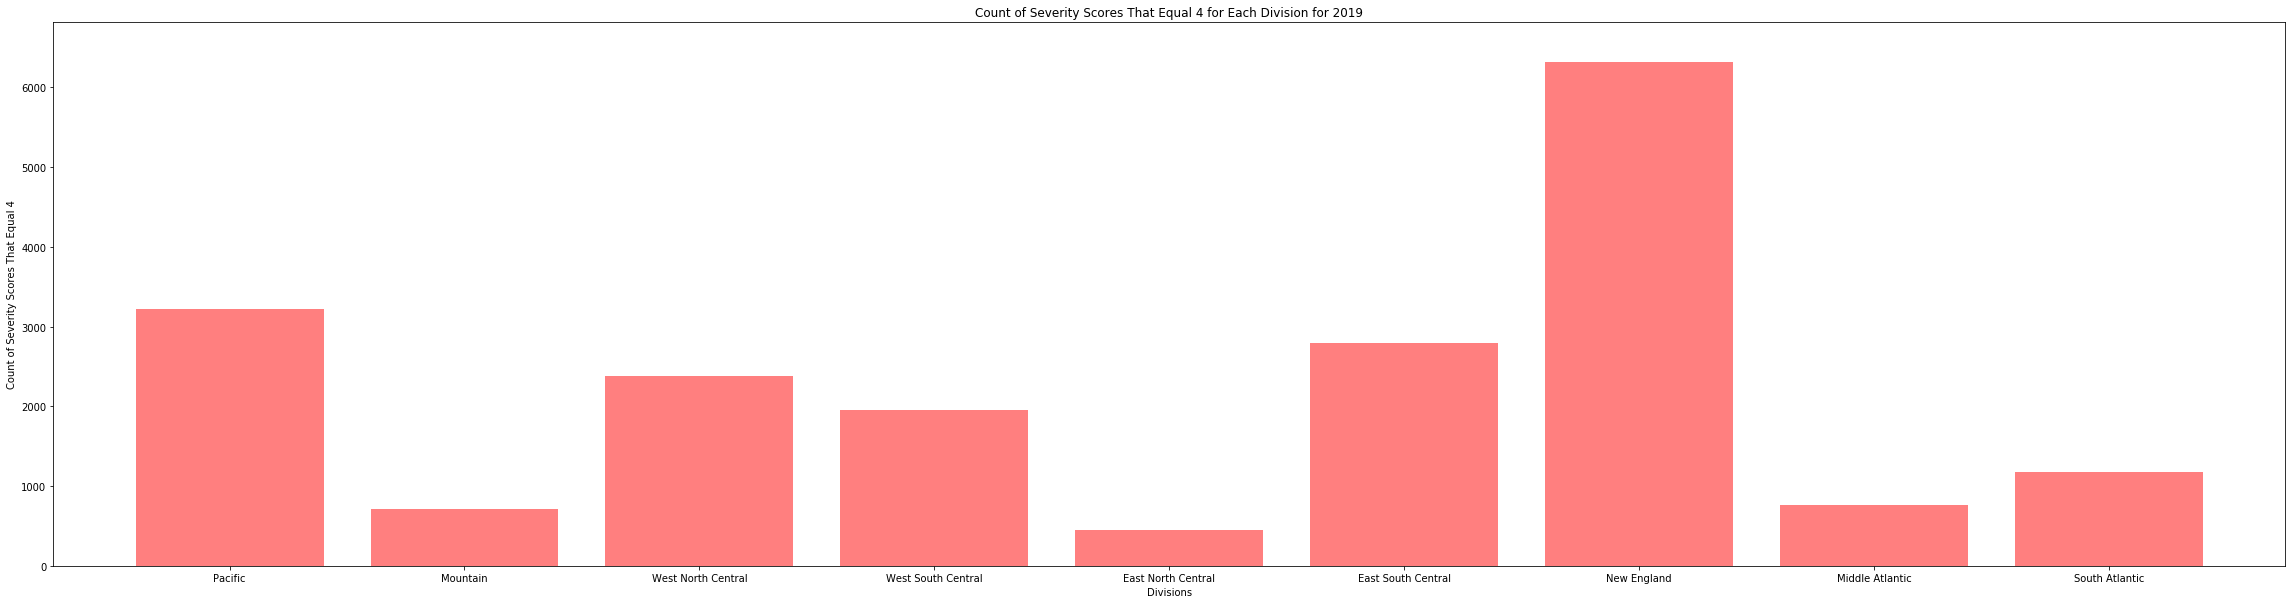

In [10]:
# Create bar chart for 2019 of count of severity scores that equal 4 for each division.
sev_sum = Count_of_Severity_Score_4_2019['Count_of_Severity_Score']
x_axis = np.arange(len(sev_sum))
plt.figure(figsize=(40, 10))
plt.bar(x_axis, sev_sum, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Pacific", "Mountain", "West North Central", "West South Central", "East North Central", "East South Central", 'New England', 'Middle Atlantic', 'South Atlantic'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sev_sum)+500)
plt.title("Count of Severity Scores That Equal 4 for Each Division for 2019")
plt.xlabel("Divisions")
plt.ylabel("Count of Severity Scores That Equal 4")

# Save image
plt.savefig('Images/Count of Severity Scores That Equal 4 for Each Division for 2019.png')
plt.show()

In [11]:
# Basic stats for bar chart above
Count_of_Severity_Score_4_2019['Count_of_Severity_Score'].describe()

count       9.00000
mean     2199.00000
std      1831.23756
min       450.00000
25%       768.00000
50%      1955.00000
75%      2799.00000
max      6319.00000
Name: Count_of_Severity_Score, dtype: float64

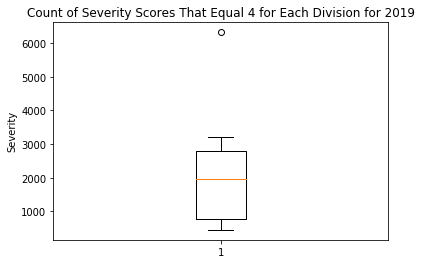

<Figure size 432x288 with 0 Axes>

In [12]:
# Box and whisker plot of above
Count_of_Severity_Score_4_2019_list = Count_of_Severity_Score_4_2019['Count_of_Severity_Score'].tolist()
times = Count_of_Severity_Score_4_2019_list
fig1, ax1 = plt.subplots()
ax1.set_title('Count of Severity Scores That Equal 4 for Each Division for 2019')
ax1.set_ylabel('Severity')
ax1.boxplot(times)
plt.show()

# Save image
plt.savefig('Images/Count of Severity Scores That Equal 4 for Each Division for 2019.png')
plt.show()

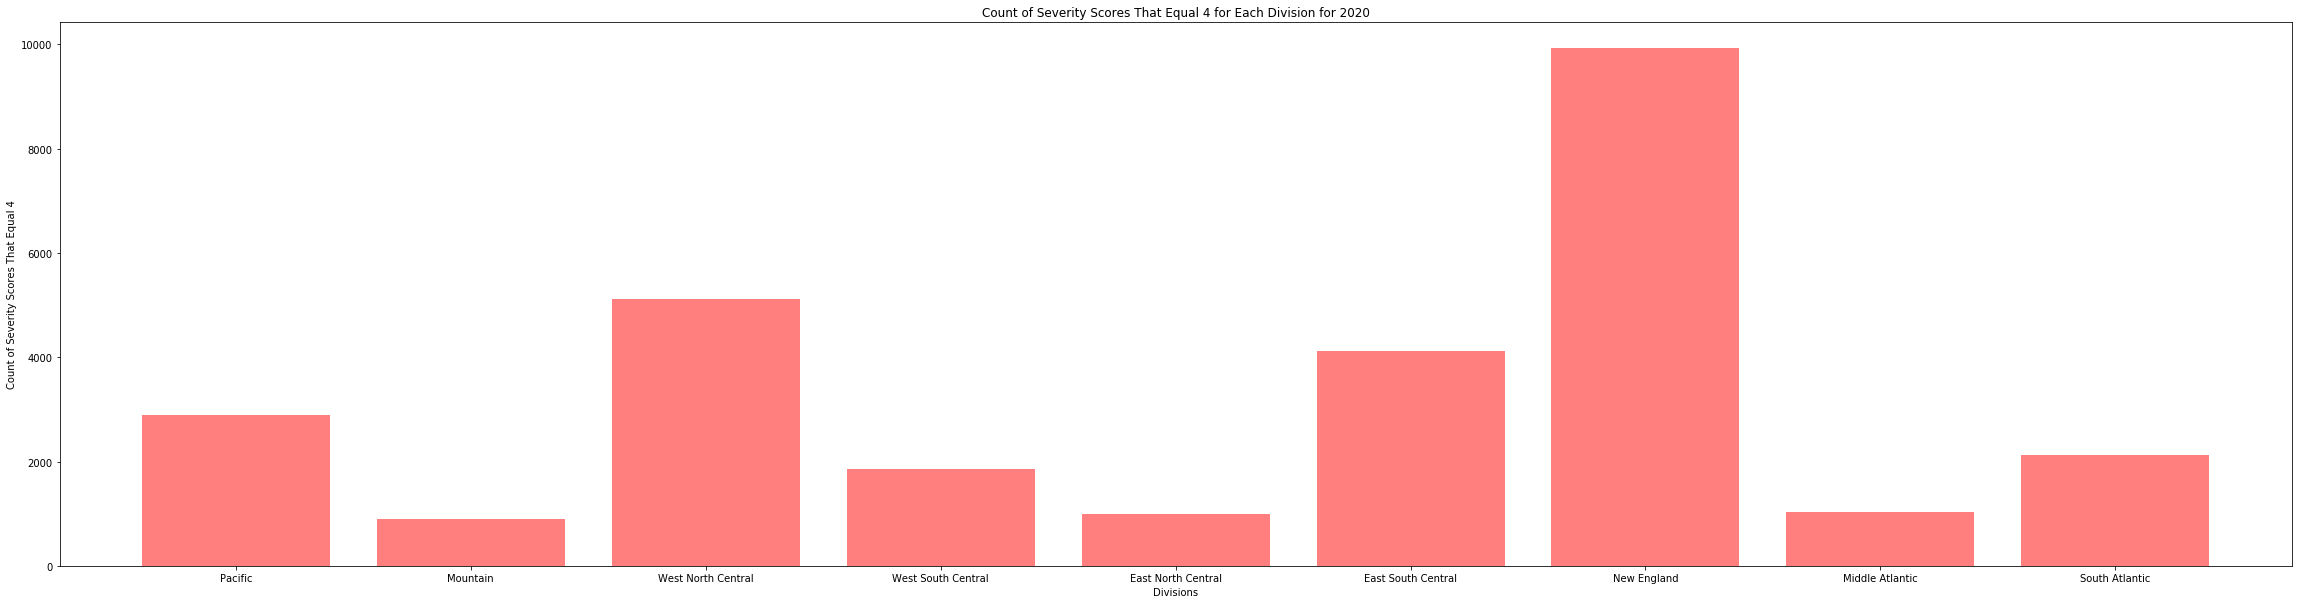

In [13]:
# Create bar chart for 2020 of count of severity scores that equal 4 for each division.
sev_sum = Count_of_Severity_Score_4_2020['Count_of_Severity_Score']
x_axis = np.arange(len(sev_sum))
plt.figure(figsize=(40, 10))
plt.bar(x_axis, sev_sum, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Pacific", "Mountain", "West North Central", "West South Central", "East North Central", "East South Central", 'New England', 'Middle Atlantic', 'South Atlantic'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sev_sum)+500)
plt.title("Count of Severity Scores That Equal 4 for Each Division for 2020")
plt.xlabel("Divisions")
plt.ylabel("Count of Severity Scores That Equal 4")

# Save image
plt.savefig('Images/Count of Severity Scores That Equal 4 for Each Division for 2020.png')
plt.show()

In [14]:
# Basic stats for bar chart above
Count_of_Severity_Score_4_2020['Count_of_Severity_Score'].describe()

count       9.000000
mean     3219.444444
std      2906.102033
min       907.000000
25%      1028.000000
50%      2127.000000
75%      4120.000000
max      9926.000000
Name: Count_of_Severity_Score, dtype: float64

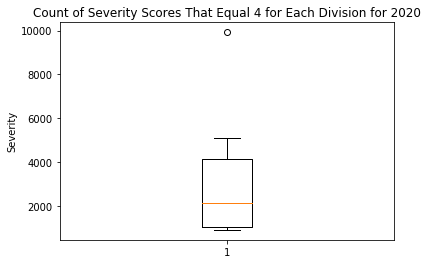

<Figure size 432x288 with 0 Axes>

In [15]:
# Box and whisker plot of above
Count_of_Severity_Score_4_2020_list = Count_of_Severity_Score_4_2020['Count_of_Severity_Score'].tolist()
times = Count_of_Severity_Score_4_2020_list
fig1, ax1 = plt.subplots()
ax1.set_title('Count of Severity Scores That Equal 4 for Each Division for 2020')
ax1.set_ylabel('Severity')
ax1.boxplot(times)
plt.show()

# Save image
plt.savefig('Images/Count of Severity Scores That Equal 4 for Each Division for 2020.png')
plt.show()